In [3]:
from ovito.io import import_file, export_file
from ovito.modifiers import BondAnalysisModifier, CreateBondsModifier

from matplotlib import pyplot as plt
import numpy as np


# Set up data pipeline:
pipeline = import_file('/home/agoga/documents/code/topcon-md/output-save/SilicaAttemptDeform/silicaanneal.dump', )
pipeline.modifiers.append(CreateBondsModifier(cutoff = 2))
pipeline.modifiers.append(BondAnalysisModifier(bins = 200))

# Export bond angle distribution to an output text file.
export_file(pipeline, 'output/bond_angles.txt', 'txt/table', key='bond-angle-distr')

# Convert bond length histogram to a NumPy array and print it to the terminal.
data = pipeline.compute(2875145)

lentab=data.tables['bond-length-distr'].xy()
angletab=data.tables['bond-angle-distr'].xy()



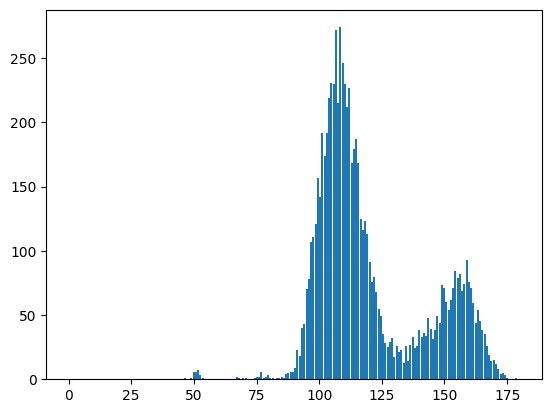

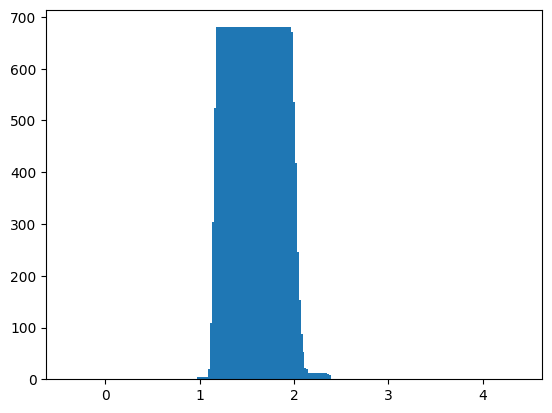

Peak Bond Angle:108.45
Peak Bond Length:1.57


In [4]:

bins = angletab[:,0]
counts=angletab[:,1]
plt.bar(bins,counts)
plt.show()

bins = lentab[:,0]
counts=lentab[:,1]
plt.bar(bins,counts)
plt.show()

# plt.scatter(angletab[:,0],angletab[:,1])
# plt.show()

# plt.scatter(lentab[:,0],lentab[:,1])
# plt.show()
anglebins=angletab[:,0]
bondbins=lentab[:,0]

print("Peak Bond Angle:{:.2f}".format(anglebins[np.argmax(angletab[:,1])]))
print("Peak Bond Length:{}".format(bondbins[np.argmax(lentab[:,1])]))

